In [1]:
import pandas as pd
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive Stats and Data Visualization

In [2]:
train = pd.read_csv('Data/drugsComTrain_raw.csv')
test = pd.read_csv('Data/drugsComTest_raw.csv')
train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [3]:
test.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [4]:
# Combining train and test data for better analysis

data = pd.concat([train, test])
# data = data.set_index('uniqueID')
# data = data.reset_index()
data.head()
# data.loc[0]

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     215063 non-null  int64 
 1   drugName     215063 non-null  object
 2   condition    213869 non-null  object
 3   review       215063 non-null  object
 4   rating       215063 non-null  int64 
 5   date         215063 non-null  object
 6   usefulCount  215063 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 13.1+ MB


In [6]:
data.describe()

,uniqueID,rating,usefulCount
count,215063.000000,215063.000000,215063.000000
mean,116039.364814,6.990008,28.001004
std,67007.913366,3.275554,36.346069
min,0.000000,1.000000,0.000000
25%,58115.500000,5.000000,6.000000
50%,115867.000000,8.000000,16.000000
75%,173963.500000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [7]:
data.dtypes

uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

In [8]:
data.isnull().any() # any() -> returns true if any of the value is true

uniqueID       False
drugName       False
condition       True
review         False
rating         False
date           False
usefulCount    False
dtype: bool

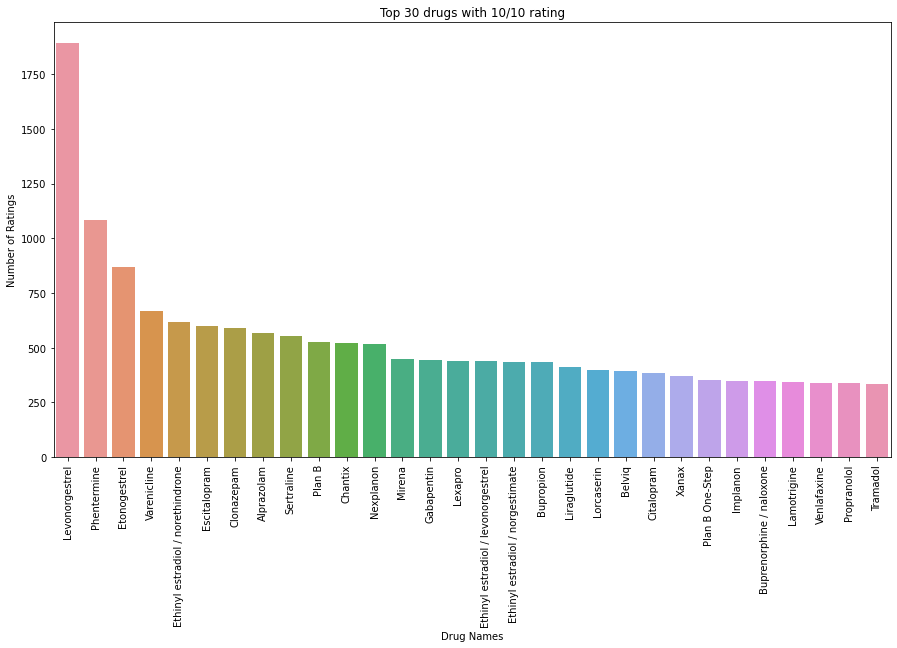

In [9]:
# barplot shows the top 30 drugs with the 10/10 rating

plt.figure(figsize=(15,8))
# data.loc[data.rating == 10]
# data.loc[data.rating == 10, "drugName"]

rating = dict(data.loc[data.rating == 10, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

# print(rating)
# print(drugname)
# print(drug_rating)

drug_rating_plot = sns.barplot(x = drugname[0:30], y = drug_rating[0:30])

drug_rating_plot.set_title('Top 30 drugs with 10/10 rating')
drug_rating_plot.set_ylabel("Number of Ratings")
drug_rating_plot.set_xlabel("Drug Names")
drug_rating_plot.set_xticklabels(drug_rating_plot.get_xticklabels(),rotation = 90)
plt.show()

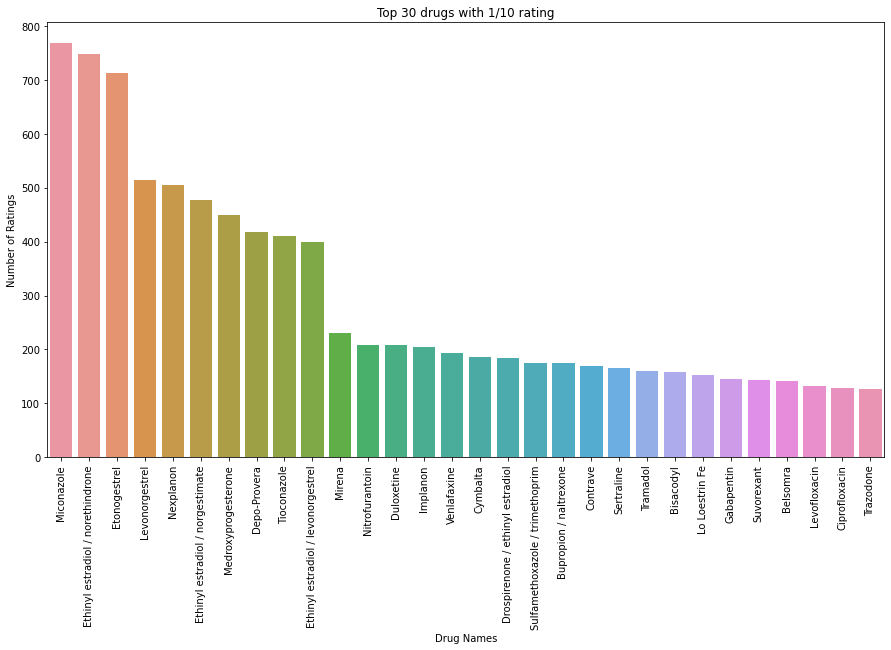

In [10]:
# barplot shows the Top 30 drugs with the 1/10 rating

plt.figure(figsize=(15,8))

rating = dict(data.loc[data.rating == 1, "drugName"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

drug_rating_plot = sns.barplot(x = drugname[0:30], y = drug_rating[0:30])

drug_rating_plot.set_title('Top 30 drugs with 1/10 rating')
drug_rating_plot.set_ylabel("Number of Ratings")
drug_rating_plot.set_xlabel("Drug Names")
drug_rating_plot.set_xticklabels(drug_rating_plot.get_xticklabels(),rotation = 90)
plt.show()

In [35]:
# !pip install wordcloud

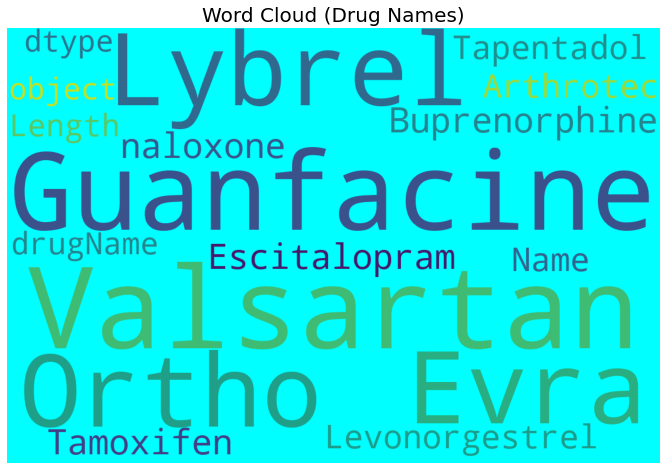

In [11]:
# most popular drugs

from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'cyan', width = 1200, height = 800).generate(str(data['drugName']))

plt.figure(figsize=(15,8))
plt.title('Word Cloud (Drug Names)', fontsize = 20)
plt.axis('off') # for displaying only the line
plt.imshow(wordcloud)
plt.show()

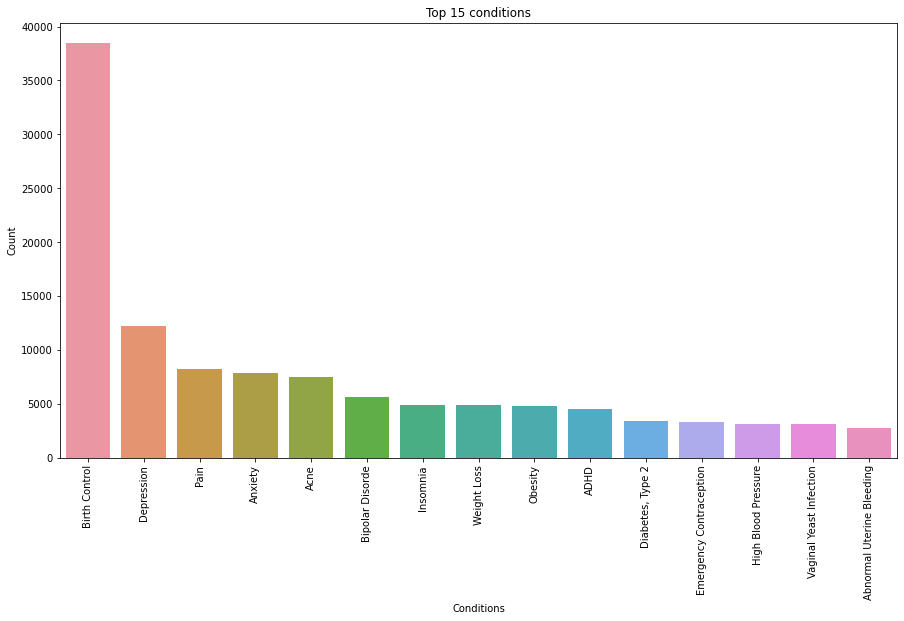

In [12]:
# barplot show the top 15 conditions the people are suffering

plt.figure(figsize=(15,8))

conditions = dict(data['condition'].value_counts())
condition_name = list(conditions.keys())
values = list(conditions.values())

top_conditions_plot = sns.barplot(x = condition_name[0:15], y = values[0:15])
top_conditions_plot.set_title("Top 15 conditions")
top_conditions_plot.set_xlabel("Conditions")
top_conditions_plot.set_ylabel("Count");
top_conditions_plot.set_xticklabels(top_conditions_plot.get_xticklabels(),rotation = 90)
plt.show()

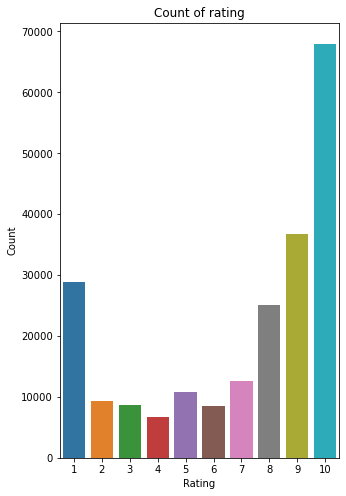

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


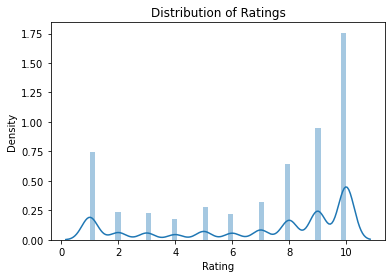

In [13]:
# countplot of the ratings and the distribution of the ratings

plt.figure(figsize=(5,8))

rating = dict(data['rating'].value_counts())
rating_number = list(rating.keys())
rating_count = list(rating.values())
rating_count_plot = sns.barplot(x = rating_number, y = rating_count)

rating_count_plot.set_title('Count of rating')
rating_count_plot.set_ylabel("Count")
rating_count_plot.set_xlabel("Rating")
rating_count_plot.set_xticklabels(rating_count_plot.get_xticklabels())
plt.show()

rating_dist = sns.distplot(data['rating'])

rating_dist.set_title('Distribution of Ratings')
rating_dist.set_xlabel("Rating")
plt.show()

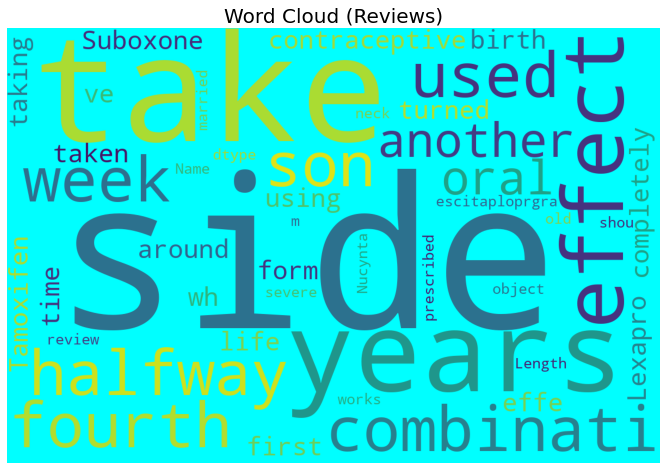

In [14]:

from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'cyan', width = 1200, height = 800).generate(str(data['review']))

plt.figure(figsize=(15,8))
plt.title('Word Cloud (Reviews)', fontsize = 20)
plt.axis('off') # for displaying only the line
plt.imshow(wordcloud)
plt.show()

In [15]:
# adding new column of name Review Sentiment (1 if rating is g.t.e to 5 and 0 if rating l.t 5)

data.loc[(data['rating'] >= 5), 'Review Sentiment'] = 1
data.loc[(data['rating'] < 5), 'Review Sentiment'] = 0

data['Review Sentiment'].value_counts()

1.0    161491
0.0     53572
Name: Review Sentiment, dtype: int64

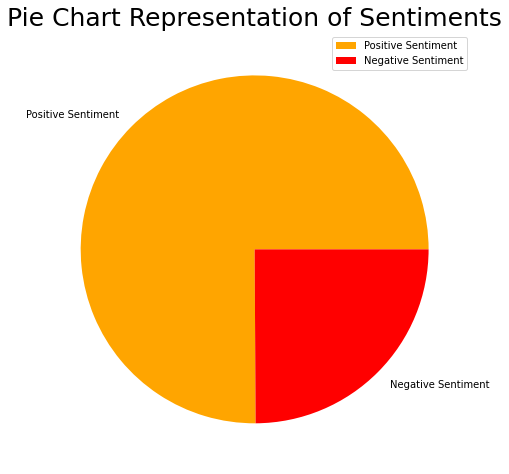

In [16]:
size = [161491, 53572]
colors = ['orange', 'red']
labels = "Positive Sentiment","Negative Sentiment"

plt.figure(figsize=(15,8))
plt.pie(size, colors = colors, labels = labels)
plt.title('Pie Chart Representation of Sentiments', fontsize = 25)
plt.legend()
plt.show()

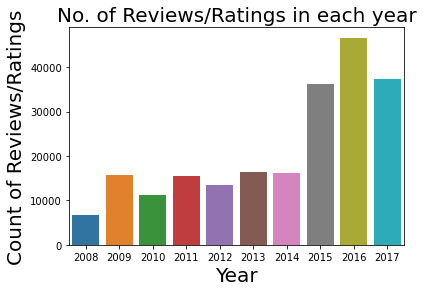

In [17]:
# converting the date into datetime format
data['date'] = pd.to_datetime(data['date'])

# adding year, month and day  
data['Year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

# no. of reviews/rating in each year

rating_review = dict(data['Year'].value_counts())
rating_review_year = list(rating_review.keys())
rating_review_count = list(rating_review.values())
rating_review_count_plot = sns.barplot(x = rating_review_year, y = rating_review_count)
rating_review_count_plot.set_title('No. of Reviews/Ratings in each year',fontsize=20)
rating_review_count_plot.set_ylabel("Count of Reviews/Ratings",fontsize=20)
rating_review_count_plot.set_xlabel("Year",fontsize=20)
rating_review_count_plot.set_xticklabels(rating_review_count_plot.get_xticklabels())
plt.show()

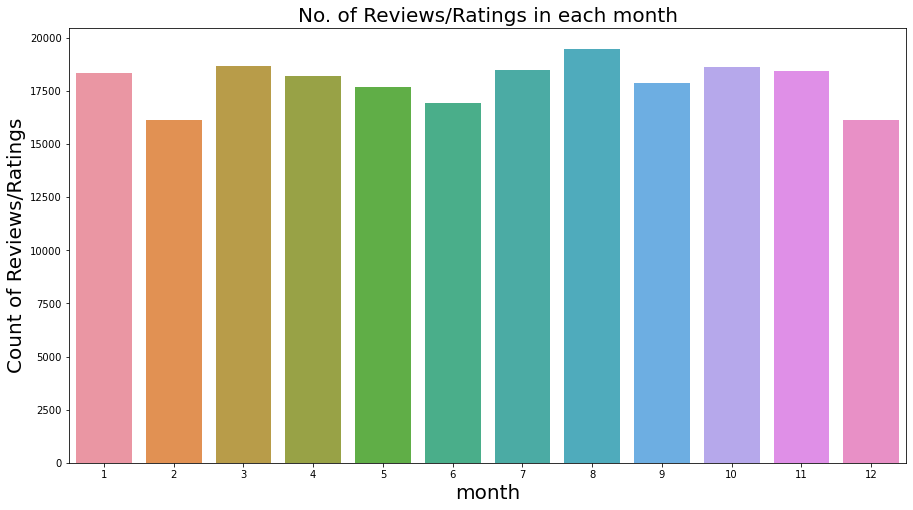

In [18]:
# no. of reviews/rating in each month
plt.figure(figsize=(15,8))
rating_review = dict(data['month'].value_counts())
rating_review_month = list(rating_review.keys())
rating_review_count = list(rating_review.values())
rating_review_count_plot = sns.barplot(x = rating_review_month, y = rating_review_count)
rating_review_count_plot.set_title('No. of Reviews/Ratings in each month',fontsize=20)
rating_review_count_plot.set_ylabel("Count of Reviews/Ratings",fontsize=20)
rating_review_count_plot.set_xlabel("month",fontsize=20)
rating_review_count_plot.set_xticklabels(rating_review_count_plot.get_xticklabels())
plt.show()

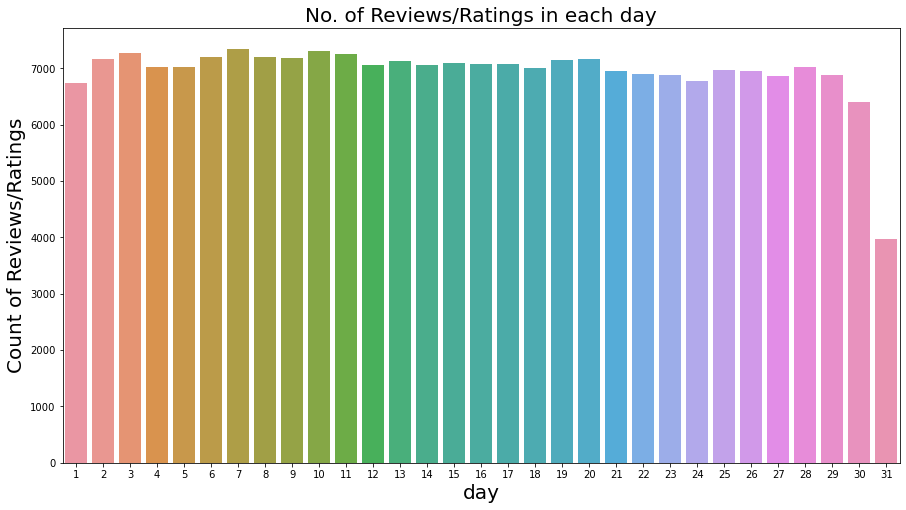

In [19]:
# no. of reviews/rating in each day
plt.figure(figsize=(15,8))
rating_review = dict(data['day'].value_counts())
rating_review_day = list(rating_review.keys())
rating_review_count = list(rating_review.values())
rating_review_count_plot = sns.barplot(x = rating_review_day, y = rating_review_count)
rating_review_count_plot.set_title('No. of Reviews/Ratings in each day',fontsize=20)
rating_review_count_plot.set_ylabel("Count of Reviews/Ratings",fontsize=20)
rating_review_count_plot.set_xlabel("day",fontsize=20)
rating_review_count_plot.set_xticklabels(rating_review_count_plot.get_xticklabels())
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


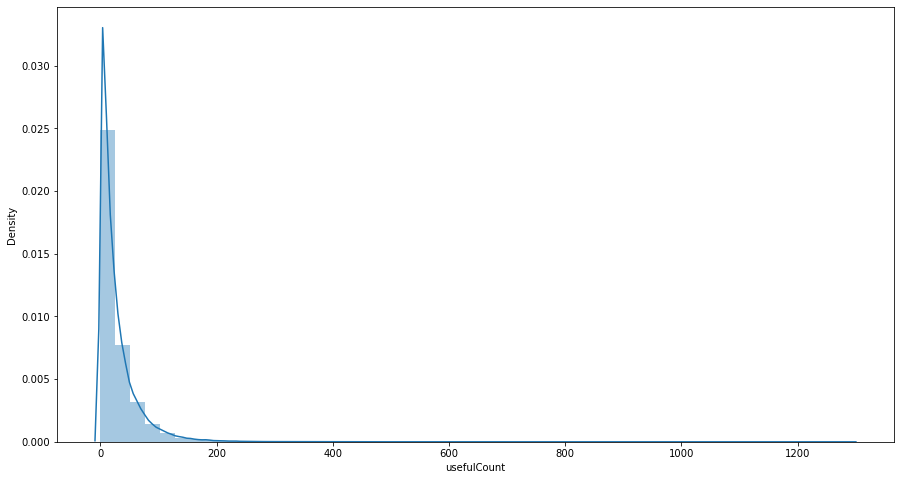

In [20]:
# distribution plot of the useful counts

plt.figure(figsize=(15,8))

usefulcounts_dist = sns.distplot(data['usefulCount'])

rating_dist.set_title('Distribution of usefulCount')
rating_dist.set_xlabel("Useful Count")
plt.show()

# Data Preprocessing

In [21]:
def review_clean(review): 
    reviewclean = review.str.lower()
    # Replacing the repeating pattern (&#039);
    reviewclean = reviewclean.str.replace("&#039;", "")
    
    # Removing all the special Characters
    reviewclean = reviewclean.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    reviewclean = reviewclean.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    reviewclean = reviewclean.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    reviewclean = reviewclean.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    reviewclean = reviewclean.str.replace(r'\.{2,}', ' ')
    
    return reviewclean

In [22]:
data['review_clean'] = review_clean(data['review'])
data.head()

C:\Users\DEEPPA~1\AppData\Local\Temp/ipykernel_14368/3035777874.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  reviewclean = reviewclean.str.replace(r'[^\w\d\s]',' ')
C:\Users\DEEPPA~1\AppData\Local\Temp/ipykernel_14368/3035777874.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  reviewclean = reviewclean.str.replace(r'[^\x00-\x7F]+',' ')
C:\Users\DEEPPA~1\AppData\Local\Temp/ipykernel_14368/3035777874.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  reviewclean = reviewclean.str.replace(r'^\s+|\s+?$','')
C:\Users\DEEPPA~1\AppData\Local\Temp/ipykernel_14368/3035777874.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  reviewclean = reviewclean.str.replace(r'\s+',' ')
C:\Users\DEEPPA~1\AppData\Local\Temp/ipykernel_14368/3035777874.py:19: FutureWarning: The default value of rege

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review Sentiment,Year,month,day,review_clean
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,1.0,2012,5,20,it has no side effect i take it in combination...
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,1.0,2010,4,27,my son is halfway through his fourth week of i...
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,1.0,2009,12,14,i used to take another oral contraceptive whic...
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,1.0,2015,11,3,this is my first time using any form of birth ...
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,1.0,2016,11,27,suboxone has completely turned my life around ...


In [31]:
# !pip install textblob

In [23]:
# Removing the stopwords

from textblob import TextBlob
from nltk.corpus import stopwords
import nltk
# from nltk import ngrams
from nltk.stem import SnowballStemmer


# nltk.download()


stop_words = set(stopwords.words('english'))
print(stop_words)
# splitting the word with space and discarding the stop words
data['review_clean'] = data['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))
data.head()

{'our', 'you', "don't", "hadn't", "you'd", 'll', 'does', 'more', "needn't", 'himself', 'itself', 'why', 'only', 'my', "aren't", 'then', "should've", 'hasn', "it's", 're', 'doesn', 'there', 'mustn', "you'll", 'won', 'further', 'other', 't', "you've", "didn't", 'weren', 'both', 'how', 'her', 'when', 'ourselves', 'own', 'or', 'wouldn', 'once', 'but', "doesn't", 'above', 'yourself', 'she', 'such', 'here', 'these', 'them', 'between', 'into', 'can', 'not', 'which', "isn't", "shan't", 'very', 'on', 'before', "haven't", 'at', 'each', 'their', 'isn', "won't", 'themselves', 'in', 'been', 'until', 'has', 'of', 'have', 'd', 'hadn', 'was', 'its', 'having', 'your', 'i', 'being', 'now', 'did', 'an', 'up', "wasn't", 'down', 'him', 'all', 'most', 'do', 'just', 'were', 'shan', 'a', 'is', "that'll", 'if', "you're", 'hers', 'm', 'by', 'out', 'because', 'those', 'any', 'mightn', 'be', 'no', 'shouldn', 'for', "couldn't", 'this', 'so', 'had', 'too', 'during', 'o', 'after', 'over', 'couldn', 'that', 'we', 'yo

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review Sentiment,Year,month,day,review_clean
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,1.0,2012,5,20,side effect take combination bystolic 5 mg fis...
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,1.0,2010,4,27,son halfway fourth week intuniv became concern...
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,1.0,2009,12,14,used take another oral contraceptive 21 pill c...
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,1.0,2015,11,3,first time using form birth control im glad we...
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,1.0,2016,11,27,suboxone completely turned life around feel he...


In [24]:
# Removing the word stems using the Snowball Stemmer

snow_ball = SnowballStemmer("english")
data['review_clean'] = data['review_clean'].apply(lambda x: " ".join(snow_ball.stem(word) for word in x.split()))

In [25]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review Sentiment,Year,month,day,review_clean
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,1.0,2012,5,20,side effect take combin bystol 5 mg fish oil
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,1.0,2010,4,27,son halfway fourth week intuniv becam concern ...
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,1.0,2009,12,14,use take anoth oral contracept 21 pill cycl ha...
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,1.0,2015,11,3,first time use form birth control im glad went...
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,1.0,2016,11,27,suboxon complet turn life around feel healthie...


In [26]:
def sentiment(review):
    # Sentiment polarity of the reviews
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

In [27]:
data['sentiment'] = sentiment(data['review'])

In [28]:
data['sentiment_clean'] = sentiment(data['review_clean'])

In [29]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review Sentiment,Year,month,day,review_clean,sentiment,sentiment_clean
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,1.0,2012,5,20,side effect take combin bystol 5 mg fish oil,0.000000,0.000000
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,1.0,2010,4,27,son halfway fourth week intuniv becam concern ...,0.168333,0.114583
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,1.0,2009,12,14,use take anoth oral contracept 21 pill cycl ha...,0.067210,0.105000
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,1.0,2015,11,3,first time use form birth control im glad went...,0.179545,0.300000
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,1.0,2016,11,27,suboxon complet turn life around feel healthie...,0.194444,0.147037


In [30]:
# Cleaning the reviews without removing the stop words and using snowball stemmer
data['review_clean_without_removing_ss'] = review_clean(data['review'])
data['sentiment_clean_without_removing_ss'] = sentiment(data['review_clean_without_removing_ss'])

C:\Users\DEEPPA~1\AppData\Local\Temp/ipykernel_14368/3035777874.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  reviewclean = reviewclean.str.replace(r'[^\w\d\s]',' ')
C:\Users\DEEPPA~1\AppData\Local\Temp/ipykernel_14368/3035777874.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  reviewclean = reviewclean.str.replace(r'[^\x00-\x7F]+',' ')
C:\Users\DEEPPA~1\AppData\Local\Temp/ipykernel_14368/3035777874.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  reviewclean = reviewclean.str.replace(r'^\s+|\s+?$','')
C:\Users\DEEPPA~1\AppData\Local\Temp/ipykernel_14368/3035777874.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  reviewclean = reviewclean.str.replace(r'\s+',' ')
C:\Users\DEEPPA~1\AppData\Local\Temp/ipykernel_14368/3035777874.py:19: FutureWarning: The default value of rege

In [31]:
# dropping row if any of the value is NULL

data = data.dropna()
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review Sentiment,Year,month,day,review_clean,sentiment,sentiment_clean,review_clean_without_removing_ss,sentiment_clean_without_removing_ss
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,1.0,2012,5,20,side effect take combin bystol 5 mg fish oil,0.000000,0.000000,it has no side effect i take it in combination...,0.000000
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,1.0,2010,4,27,son halfway fourth week intuniv becam concern ...,0.168333,0.114583,my son is halfway through his fourth week of i...,0.168333
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,1.0,2009,12,14,use take anoth oral contracept 21 pill cycl ha...,0.067210,0.105000,i used to take another oral contraceptive whic...,0.067210
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,2015-11-03,10,1.0,2015,11,3,first time use form birth control im glad went...,0.179545,0.300000,this is my first time using any form of birth ...,0.179545
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,1.0,2016,11,27,suboxon complet turn life around feel healthie...,0.194444,0.147037,suboxone has completely turned my life around ...,0.194444


In [32]:
import string
# Word count in each review
data['word_count'] = data["review_clean_without_removing_ss"].apply(lambda x: len(str(x).split()))

# Unique word count 
data['unique_word_count'] = data["review_clean_without_removing_ss"].apply(lambda x: len(set(str(x).split())))

# Letter count
data['letters_count']=data["review_clean_without_removing_ss"].apply(lambda x: len(str(x)))

# punctuation count
data["count_punctuations"] = data["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# upper case words count
data["upper_words_count"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
data["title_words_count"] = data["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
data["stopwords_count"] = data["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#Average length of the words
data["mean_word_length"] = data["review_clean_without_removing_ss"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

D:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [33]:
data.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount', 'Review Sentiment', 'Year', 'month', 'day',
       'review_clean', 'sentiment', 'sentiment_clean',
       'review_clean_without_removing_ss',
       'sentiment_clean_without_removing_ss', 'word_count',
       'unique_word_count', 'letters_count', 'count_punctuations',
       'upper_words_count', 'title_words_count', 'stopwords_count',
       'mean_word_length'],
      dtype='object')

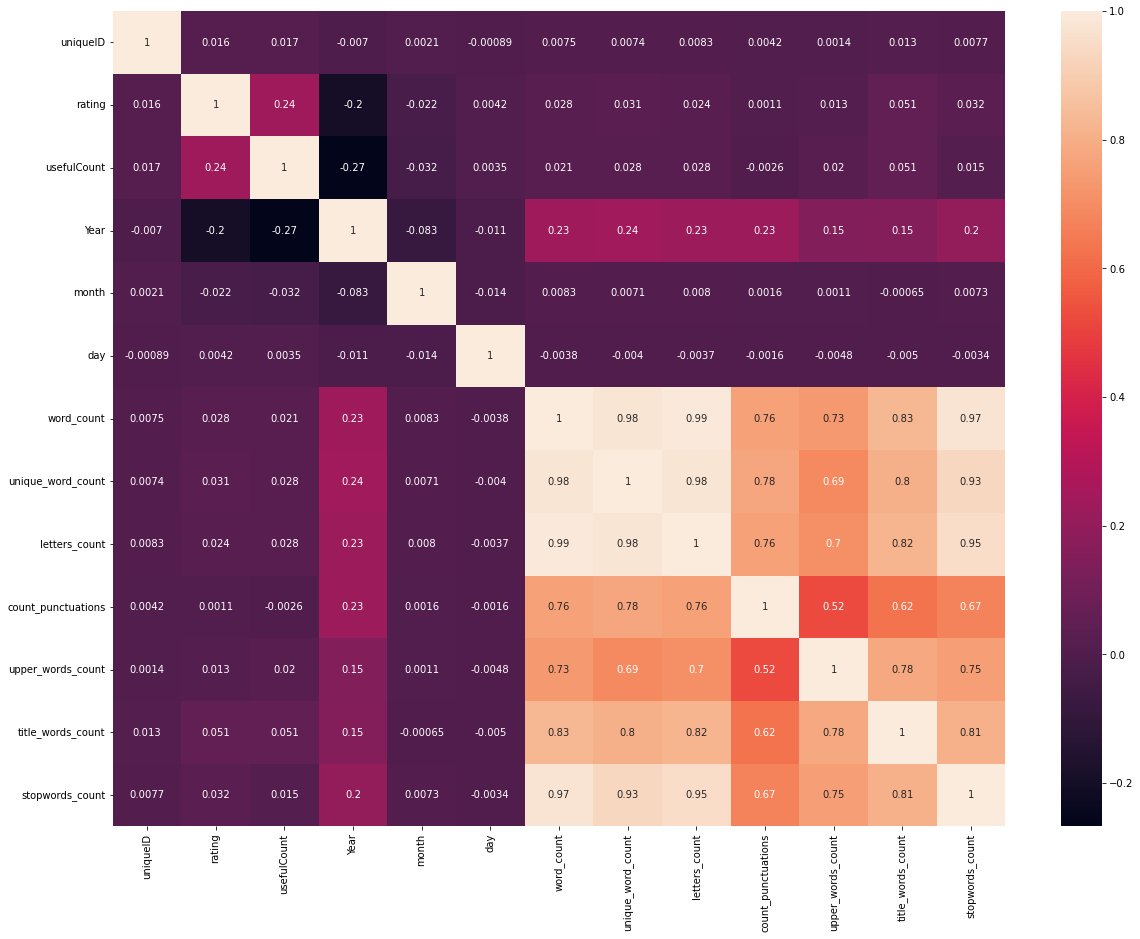

In [34]:
# Correlation Heatmap of the features engineered

plt.figure(figsize=(20,15))
corr = data.select_dtypes(include = 'int64').corr()
sns_ = sns.heatmap(corr, annot = True)
plt.show()

In [44]:
# changing categorical values of drugname and condition to numerical value

from sklearn.preprocessing import LabelEncoder
label_encoder_feat = {}
for feature in ['drugName', 'condition']:
    label_encoder_feat[feature] = LabelEncoder()
    data[feature] = label_encoder_feat[feature].fit_transform(data[feature])
data = data.dropna()
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount,Review Sentiment,Year,month,...,review_clean_without_removing_ss,sentiment_clean_without_removing_ss,word_count,unique_word_count,letters_count,count_punctuations,upper_words_count,title_words_count,stopwords_count,mean_word_length
0,206461,3421,480,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,1.0,2012,5,...,it has no side effect i take it in combination...,0.000000,17,16,76,3,1,6,7,3.529412
1,95260,1536,80,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,1.0,2010,4,...,my son is halfway through his fourth week of i...,0.168333,141,97,716,23,2,13,69,4.085106
2,92703,1983,175,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,1.0,2009,12,...,i used to take another oral contraceptive whic...,0.067210,134,89,714,34,6,15,59,4.335821
3,138000,2446,175,"""This is my first time using any form of birth...",8,2015-11-03,10,1.0,2015,11,...,this is my first time using any form of birth ...,0.179545,91,58,432,15,4,9,45,3.758242
4,35696,553,593,"""Suboxone has completely turned my life around...",9,2016-11-27,37,1.0,2016,11,...,suboxone has completely turned my life around ...,0.194444,125,85,670,28,7,15,60,4.368000


In [56]:
# !pip install xgboost

In [57]:
# !pip install lightgbm

In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMModel,LGBMClassifier, plot_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [46]:
# Defining Features and splitting the data as train and test set

features = data[['condition', 'usefulCount', 'sentiment',
                   'sentiment_clean_without_removing_ss', 'word_count', 'unique_word_count', 'letters_count',
                   'count_punctuations', 'upper_words_count', 'title_words_count',
                   'stopwords_count', 'mean_word_length']]

target = data['Review Sentiment']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)
print ("Training data size ", X_train.shape)
print ("Testing data size ", X_test.shape)
# print(X_train)
# print()
# print(y_train)

Training data size  (149706, 12)
Testing data size  (64161, 12)


In [51]:
accuracy = []
algorithm = []

# Decision Tree

In [55]:
# tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,60,70,80,90,100,120,150]}
# clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5, refit= True, verbose = 3)
# clf.fit(X_train,y_train)
# print(clf.best_params_)
# print(clf.best_estimator_)
# grid_predictions = clf.predict(X_test)

# --> DecisionTreeClassifier(criterion='entropy', max_depth=50)

clf = DecisionTreeClassifier(criterion='entropy',max_depth=50)
clf.fit(X_train,y_train)
predictions = clf.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions))
accuracy.append(accuracy_score(y_test, predictions))
algorithm.append("Decision Tree")
print(metrics.classification_report(y_test,predictions))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions)



The Accuracy of the model is :  0.8626891725503032
              precision    recall  f1-score   support

         0.0       0.72      0.74      0.73     16049
         1.0       0.91      0.90      0.91     48112

    accuracy                           0.86     64161
   macro avg       0.82      0.82      0.82     64161
weighted avg       0.86      0.86      0.86     64161

The confusion Matrix is 


array([[11889,  4160],
       [ 4650, 43462]], dtype=int64)

# LGBM

In [56]:
# grid_para = {'n_estimators':[1000,5000,10000],
#              'learning_rate':[0.05,0.01,0.1],
#              'num_leaves': [10,20,25,30],
#              'max_depth':[5,7,10],
#             }
# clf = GridSearchCV(LGBMClassifier(), grid_para, cv=5, refit= True, verbose = 3)
# model = clf.fit(X_train,y_train)
# print(model.best_params_)
# print(model.best_estimator_)
# grid_predictions = model.predict(X_test)


clf = LGBMClassifier(n_estimators = 10000, learning_rate = 0.10, num_leaves = 30, max_depth = 7)
model = clf.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions))
accuracy.append(accuracy_score(y_test, predictions))
algorithm.append("LGBM")
print(metrics.classification_report(y_test,predictions))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions)



The Accuracy of the model is :  0.8915384735275323
              precision    recall  f1-score   support

         0.0       0.84      0.70      0.76     16049
         1.0       0.91      0.95      0.93     48112

    accuracy                           0.89     64161
   macro avg       0.87      0.83      0.85     64161
weighted avg       0.89      0.89      0.89     64161

The confusion Matrix is 


array([[11275,  4774],
       [ 2185, 45927]], dtype=int64)

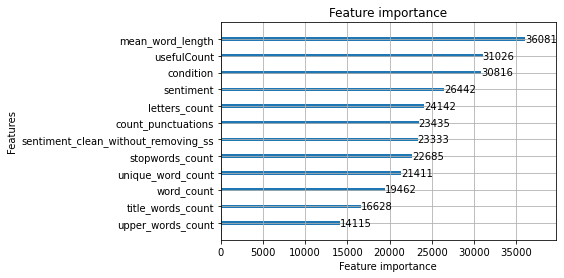

In [57]:
# Feature Importance Plot using LGBM

plot_importance(model);

# Naive Bayes

In [59]:
nb = BernoulliNB()
nb.fit(X_train, y_train)

predictions = nb.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions))
accuracy.append(accuracy_score(y_test, predictions))
algorithm.append("BernoulliNB")
print(metrics.classification_report(y_test,predictions))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions)

The Accuracy of the model is :  0.6836395941459765
              precision    recall  f1-score   support

         0.0       0.41      0.60      0.49     16049
         1.0       0.84      0.71      0.77     48112

    accuracy                           0.68     64161
   macro avg       0.63      0.66      0.63     64161
weighted avg       0.73      0.68      0.70     64161

The confusion Matrix is 


array([[ 9639,  6410],
       [13888, 34224]], dtype=int64)

In [60]:
# for multinomial error occurs as -ve value is there 
nb = GaussianNB()
nb.fit(X_train, y_train)

predictions = nb.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions))
accuracy.append(accuracy_score(y_test, predictions))
algorithm.append("GaussianNB")
print(metrics.classification_report(y_test,predictions))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions)

The Accuracy of the model is :  0.7502688549118623
              precision    recall  f1-score   support

         0.0       0.50      0.43      0.46     16049
         1.0       0.82      0.86      0.84     48112

    accuracy                           0.75     64161
   macro avg       0.66      0.64      0.65     64161
weighted avg       0.74      0.75      0.74     64161

The confusion Matrix is 


array([[ 6928,  9121],
       [ 6902, 41210]], dtype=int64)

# K-NN

In [69]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(X_train)    
x_test= st_x.transform(X_test)  

# k_range = list(range(1, 31))
# param_grid = dict(n_neighbors=k_range)
# classifier = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5, refit = True, verbose = 3)
# classifier.fit(x_train, y_train)
# print(model.best_params_)
# print(model.best_estimator_)
# predictions = classifier.predict(x_test)


classifier= KNeighborsClassifier(n_neighbors=30)  
classifier.fit(x_train, y_train)  
predictions = classifier.predict(x_test)  
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions))
accuracy.append(accuracy_score(y_test, predictions))
algorithm.append("K-NN")
print(metrics.classification_report(y_test,predictions))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions)

The Accuracy of the model is :  0.7744424182914855
              precision    recall  f1-score   support

         0.0       0.60      0.30      0.40     16049
         1.0       0.80      0.93      0.86     48112

    accuracy                           0.77     64161
   macro avg       0.70      0.62      0.63     64161
weighted avg       0.75      0.77      0.75     64161

The confusion Matrix is 


array([[ 4754, 11295],
       [ 3177, 44935]], dtype=int64)

# Logistic Regression

In [71]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

# param_grid = {'solver': ['newton-cg','liblinear','sag','saga','lbfgs']}
# clf = GridSearchCV(LogisticRegression(), param_grid, cv=5, refit= True, verbose = 3)
# model = clf.fit(x_train,y_train)
# print(model.best_params_)
# print(model.best_estimator_)
# grid_predictions = model.predict(X_test)

model = LogisticRegression(solver = 'newton-cg')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions))
accuracy.append(accuracy_score(y_test, predictions))
algorithm.append("Logistic Regression")
print(metrics.classification_report(y_test,predictions))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions)

The Accuracy of the model is :  0.774115116659653
              precision    recall  f1-score   support

         0.0       0.66      0.20      0.31     16049
         1.0       0.78      0.96      0.86     48112

    accuracy                           0.77     64161
   macro avg       0.72      0.58      0.59     64161
weighted avg       0.75      0.77      0.73     64161

The confusion Matrix is 


array([[ 3278, 12771],
       [ 1722, 46390]], dtype=int64)

In [72]:
print(accuracy)
print(algorithm)

[0.8616760960708219, 0.8915384735275323, 0.8626891725503032, 0.8915384735275323, 0.6836395941459765, 0.6836395941459765, 0.7502688549118623, 0.7744424182914855, 0.774115116659653]
['Decision Tree', 'LGBM', 'Decision Tree', 'LGBM', 'BernoulliNB', 'BernoulliNB', 'GaussianNB', 'K-NN', 'Logistic Regression']


<BarContainer object of 9 artists>

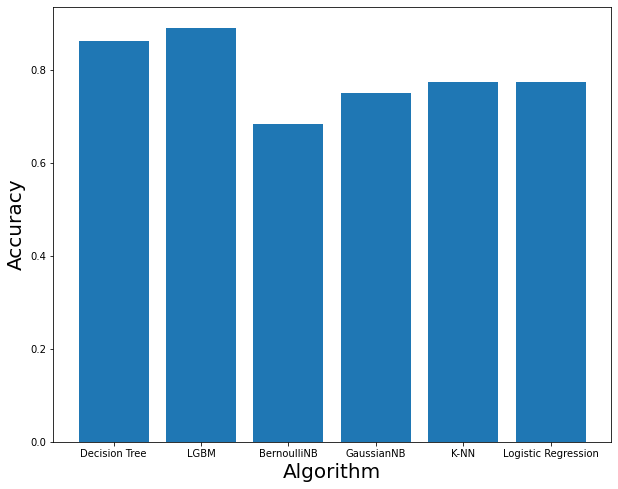

In [77]:
plt.figure(figsize=(10,8))
plt.xlabel("Algorithm",fontsize=20)
plt.ylabel("Accuracy",fontsize=20)
plt.bar(algorithm,accuracy)